In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import csv
import numpy as np
import datetime as dt
import pandas_datareader as pdr

# Correlation
* Correlation measures association, but doesnt show if x causes y or vice-versa
* Correlation is a static that measures the degree to which two variables move in relation to each other
* In finance, the corelation can measure the movement of a stock with that of a benchamark index, such as the S&P 500

In [21]:
ticker=["AAPL","TWTR","IBM",'TSLA']
start=dt.datetime(2022,1,1)

data=pdr.get_data_yahoo(ticker,start)

In [22]:
data=data['Adj Close']

In [23]:
data.head()

Symbols,AAPL,TWTR,IBM,TSLA
Date,,,,
2021-12-31,176.838257,43.220001,128.862717,352.260010
2022-01-03,181.259918,42.660000,131.157272,399.926666
2022-01-04,178.959442,40.849998,133.066223,383.196655
2022-01-05,174.199158,39.500000,133.259048,362.706665
2022-01-06,171.291183,39.590000,130.482407,354.899994


In [24]:
log_return=np.log(data/data.shift())

In [25]:
data.head()

Symbols,AAPL,TWTR,IBM,TSLA
Date,,,,
2021-12-31,176.838257,43.220001,128.862717,352.260010
2022-01-03,181.259918,42.660000,131.157272,399.926666
2022-01-04,178.959442,40.849998,133.066223,383.196655
2022-01-05,174.199158,39.500000,133.259048,362.706665
2022-01-06,171.291183,39.590000,130.482407,354.899994


In [27]:
log_return

Symbols,AAPL,TWTR,IBM,TSLA
Date,,,,
2021-12-31,NaN,NaN,NaN,NaN
2022-01-03,0.024697,-0.013042,0.017650,0.126912
2022-01-04,-0.012773,-0.043355,0.014450,-0.042733
2022-01-05,-0.026960,-0.033606,0.001448,-0.054954
2022-01-06,-0.016834,0.002276,-0.021057,-0.021758
...,...,...,...,...
2022-10-14,-0.032771,0.002183,-0.014473,-0.078454
2022-10-17,0.028707,0.005732,0.012254,0.067707
2022-10-18,0.009365,0.020289,0.011618,0.003822


In [28]:
log_return.corr()

Symbols,AAPL,TWTR,IBM,TSLA
Symbols,,,,
AAPL,1.000000,0.319068,0.443546,0.692162
TWTR,0.319068,1.000000,0.101148,0.388524
IBM,0.443546,0.101148,1.000000,0.224238
TSLA,0.692162,0.388524,0.224238,1.000000


In [31]:
sp500=pdr.get_data_yahoo("^GSPC",start)

In [33]:
sp500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-31,4786.830078,4765.750000,4775.209961,4766.180176,2446190000,4766.180176
2022-01-03,4796.640137,4758.169922,4778.140137,4796.560059,2775190000,4796.560059
2022-01-04,4818.620117,4774.270020,4804.509766,4793.540039,3641050000,4793.540039
2022-01-05,4797.700195,4699.439941,4787.990234,4700.580078,3733540000,4700.580078
2022-01-06,4725.009766,4671.259766,4693.390137,4696.049805,3371250000,4696.049805


In [38]:
log_return['SP500']=np.log(sp500['Adj Close']/sp500['Adj Close'].shift())

In [39]:
log_return

Symbols,AAPL,TWTR,IBM,TSLA,SP500
Date,,,,,
2021-12-31,NaN,NaN,NaN,NaN,NaN
2022-01-03,0.024697,-0.013042,0.017650,0.126912,0.006354
2022-01-04,-0.012773,-0.043355,0.014450,-0.042733,-0.000630
2022-01-05,-0.026960,-0.033606,0.001448,-0.054954,-0.019583
2022-01-06,-0.016834,0.002276,-0.021057,-0.021758,-0.000964
...,...,...,...,...,...
2022-10-14,-0.032771,0.002183,-0.014473,-0.078454,-0.023947
2022-10-17,0.028707,0.005732,0.012254,0.067707,0.026136
2022-10-18,0.009365,0.020289,0.011618,0.003822,0.011363


In [43]:
log_return.head().corr()

Symbols,AAPL,TWTR,IBM,TSLA,SP500
Symbols,,,,,
AAPL,1.000000,0.288414,0.559642,0.976399,0.785436
TWTR,0.288414,1.000000,-0.628541,0.415528,0.402949
IBM,0.559642,-0.628541,1.000000,0.443964,0.241171
TSLA,0.976399,0.415528,0.443964,1.000000,0.695426
SP500,0.785436,0.402949,0.241171,0.695426,1.000000


In [46]:
def test_correlation(ticker):
    df=pdr.get_data_yahoo(ticker,start)
    lr=log_return.copy()
    lr[ticker]=np.log(df['Adj Close']/df['Adj Close'].shift())
    return lr.corr()

In [47]:
test_correlation("LQD")

Symbols,AAPL,TWTR,IBM,TSLA,SP500,LQD
Symbols,,,,,,
AAPL,1.000000,0.319068,0.443546,0.692162,0.886431,0.332271
TWTR,0.319068,1.000000,0.101148,0.388524,0.374253,0.176278
IBM,0.443546,0.101148,1.000000,0.224238,0.508078,0.198522
TSLA,0.692162,0.388524,0.224238,1.000000,0.676608,0.185496
SP500,0.886431,0.374253,0.508078,0.676608,1.000000,0.431531
LQD,0.332271,0.176278,0.198522,0.185496,0.431531,1.000000


In [48]:
test_correlation("TLT")

Symbols,AAPL,TWTR,IBM,TSLA,SP500,TLT
Symbols,,,,,,
AAPL,1.000000,0.319068,0.443546,0.692162,0.886431,-0.007533
TWTR,0.319068,1.000000,0.101148,0.388524,0.374253,-0.030226
IBM,0.443546,0.101148,1.000000,0.224238,0.508078,-0.034833
TSLA,0.692162,0.388524,0.224238,1.000000,0.676608,-0.101125
SP500,0.886431,0.374253,0.508078,0.676608,1.000000,0.033176
TLT,-0.007533,-0.030226,-0.034833,-0.101125,0.033176,1.000000


In [49]:
def vis_corr(ticker1,ticker2):
    df=pdr.get_data_yahoo([ticker1,ticker2],start)
    df=df['Adj Close']
    df=df/df.iloc[0]
    fig,ax=plt.subplots()
    df.plot(ax=ax)

<IPython.core.display.Javascript object>


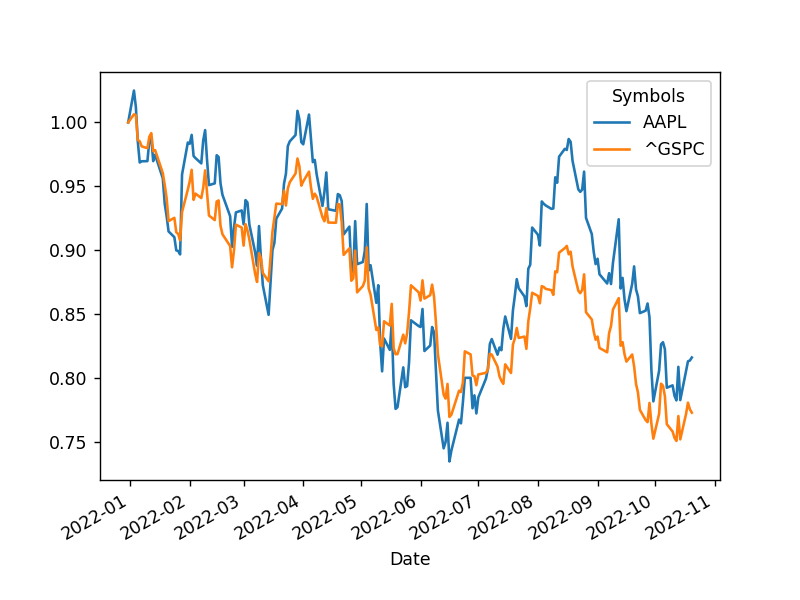

In [53]:
vis_corr('AAPL','^GSPC')